# Multi-Modal RAG System

In this notebook we will demonstrate the following:

1. Querying images with a Multi-Modal LLM.
2. Buidling a Multi-Modal RAG System.

## Installation

In [ ]:
!pip install llama-index-multi-modal-llms-openai
!pip install llama-index-vector-stores-qdrant
!pip install llama_index ftfy regex tqdm
!pip install llama-index-embeddings-clip
!pip install git+https://github.com/openai/CLIP.git
!pip install matplotlib scikit-image

## Set API Key

In [ ]:
import os

os.environ["OPENAI_API_KEY"] = "sk-..."

## Load Images with `urls`

In [ ]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

from llama_index.core.multi_modal_llms.generic_utils import load_image_urls


image_urls = [
    "https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg",
]

image_documents = load_image_urls(image_urls)

## Querying with `GPT-4V` vision API.

In [ ]:
openai_mm_llm = OpenAIMultiModal(
    model="gpt-4-vision-preview", max_new_tokens=300
)

In [ ]:
response = openai_mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

print(response)

The image shows the Colosseum in Rome, Italy, illuminated at night with the colors of the Italian flag: green, white, and red. The ancient amphitheater's iconic arches are vividly lit, and the structure stands out against the dark blue evening sky. Some construction or excavation work appears to be taking place in the foreground, and a few people can be seen walking near the site.


## Load Images from directory

In [ ]:
from pathlib import Path

input_image_path = Path("input_images")
if not input_image_path.exists():
    Path.mkdir(input_image_path)

In [ ]:
!wget "https://docs.google.com/uc?export=download&id=1nUhsBRiSWxcVQv8t8Cvvro8HJZ88LCzj" -O ./input_images/long_range_spec.png
!wget "https://docs.google.com/uc?export=download&id=19pLwx0nVqsop7lo0ubUSYTzQfMtKJJtJ" -O ./input_images/model_y.png
!wget "https://docs.google.com/uc?export=download&id=1utu3iD9XEgR5Sb7PrbtMf1qw8T1WdNmF" -O ./input_images/performance_spec.png
!wget "https://docs.google.com/uc?export=download&id=1dpUakWMqaXR4Jjn1kHuZfB0pAXvjn2-i" -O ./input_images/price.png
!wget "https://docs.google.com/uc?export=download&id=1qNeT201QAesnAP5va1ty0Ky5Q_jKkguV" -O ./input_images/real_wheel_spec.png

--2024-04-27 20:51:52--  https://docs.google.com/uc?export=download&id=1nUhsBRiSWxcVQv8t8Cvvro8HJZ88LCzj
Resolving docs.google.com (docs.google.com)... 172.253.63.113, 172.253.63.139, 172.253.63.100, ...
Connecting to docs.google.com (docs.google.com)|172.253.63.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1nUhsBRiSWxcVQv8t8Cvvro8HJZ88LCzj&export=download [following]
--2024-04-27 20:51:52--  https://drive.usercontent.google.com/download?id=1nUhsBRiSWxcVQv8t8Cvvro8HJZ88LCzj&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.122.132, 2607:f8b0:4004:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.122.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160684 (157K) [image/png]
Saving to: ‘./input_images/long_range_spec.png’

./input_images/long 100%[===================>] 156.92K  --.-KB/

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os


def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 9:
                break

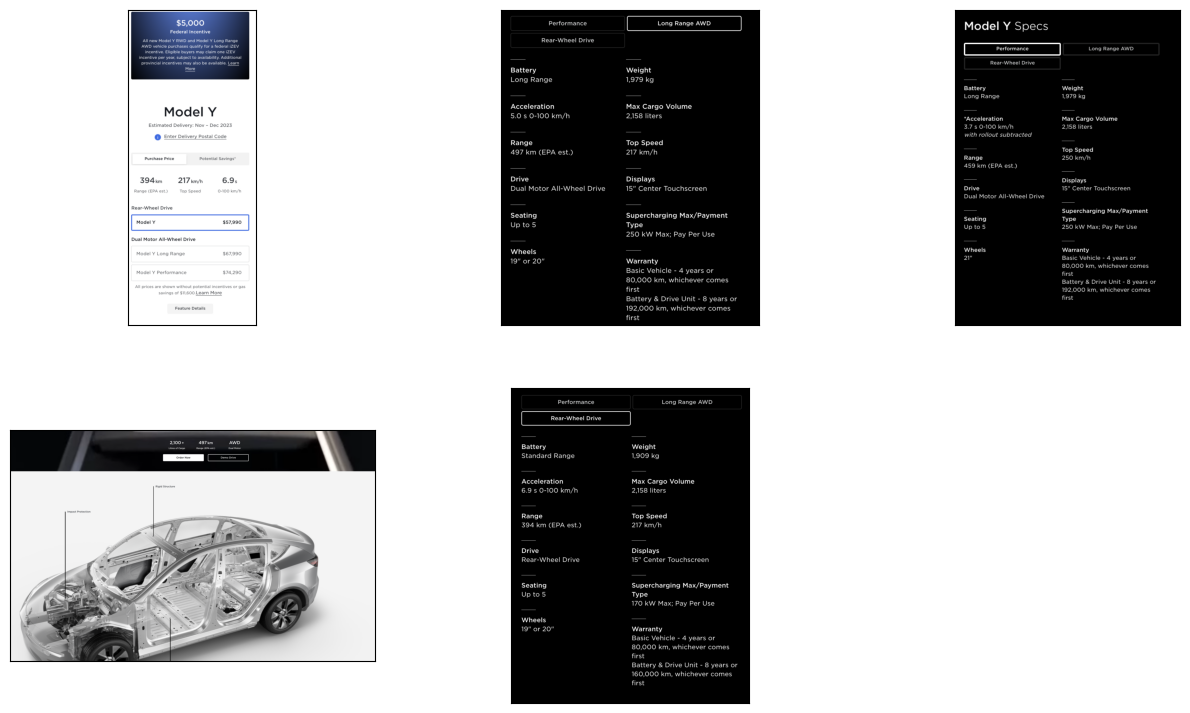

In [ ]:
image_paths = []
for img_path in os.listdir("./input_images"):
    image_paths.append(str(os.path.join("./input_images", img_path)))
plot_images(image_paths)

In [ ]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.core import SimpleDirectoryReader

# put your local directore here
image_documents = SimpleDirectoryReader("./input_images").load_data()

In [ ]:
response = openai_mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

print(response)

The images provided appear to be screenshots from a website showcasing specifications and details of an electric vehicle, likely from a car manufacturer's website. Here is a description of each image:

1. The first image is a comparison chart of two electric vehicle models, one with Rear-Wheel Drive and the other with Long Range AWD (All-Wheel Drive). It lists various specifications such as battery type, acceleration, range, top speed, cargo volume, seating, wheels, and warranty details.

2. The second image shows a cutaway illustration of an electric vehicle, highlighting its structural components. The image points out the rigid structure and impact protection features of the car's design.

3. The third image is similar to the first one, providing a detailed specification list for the Model Y Performance and Long Range AWD versions of an electric vehicle. It includes information on battery, acceleration, range, top speed, drive type, seating, wheels, and warranty.

4. The fourth image

## Plot Images

In [ ]:
import requests


def get_wikipedia_images(title):
    response = requests.get(
        "https://en.wikipedia.org/w/api.php",
        params={
            "action": "query",
            "format": "json",
            "titles": title,
            "prop": "imageinfo",
            "iiprop": "url|dimensions|mime",
            "generator": "images",
            "gimlimit": "50",
        },
    ).json()
    image_urls = []
    for page in response["query"]["pages"].values():
        if page["imageinfo"][0]["url"].endswith(".jpg") or page["imageinfo"][
            0
        ]["url"].endswith(".png"):
            image_urls.append(page["imageinfo"][0]["url"])
    return image_urls

## Download Images and Text from Wikipedia

In [ ]:
from pathlib import Path
import requests
import urllib.request
import time

image_uuid = 0
# image_metadata_dict stores images metadata including image uuid, filename and path
image_metadata_dict = {}
MAX_IMAGES_PER_WIKI = 15

wiki_titles = {
    "Tesla Model Y",
    "Tesla Model X",
    "Tesla Model 3",
    "Tesla Model S",
    "Kia EV6",
    "BMW i3",
    "Audi e-tron",
    "Ford Mustang",
    "Porsche Taycan",
    "Rivian",
    "Polestar",
}

data_path = Path("mixed_wiki")
if not data_path.exists():
    Path.mkdir(data_path)

for title in wiki_titles:
    response = requests.get(
        "https://en.wikipedia.org/w/api.php",
        params={
            "action": "query",
            "format": "json",
            "titles": title,
            "prop": "extracts",
            "explaintext": True,
        },
    ).json()
    page = next(iter(response["query"]["pages"].values()))
    wiki_text = page["extract"]

    with open(data_path / f"{title}.txt", "w") as fp:
        fp.write(wiki_text)

    images_per_wiki = 0
    try:
        # page_py = wikipedia.page(title)
        list_img_urls = get_wikipedia_images(title)

        # print(list_img_urls)

        for url in list_img_urls:
            if (
                url.endswith(".jpg")
                or url.endswith(".png")
                or url.endswith(".svg")
            ):
                image_uuid += 1
                # image_file_name = title + "_" + url.split("/")[-1]

                urllib.request.urlretrieve(
                    url, data_path / f"{image_uuid}.jpg"
                )
                time.sleep(1)
                images_per_wiki += 1
                # Limit the number of images downloaded per wiki page to 15
                if images_per_wiki > MAX_IMAGES_PER_WIKI:
                    break
    except Exception as e:
        print(e)
        print(
            "Number of images found for Wikipedia page: {} are {}".format(
                title, images_per_wiki
            )
        )
        continue

## Setup Qdrant client for indexing

In [ ]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import SimpleDirectoryReader, StorageContext
import qdrant_client


# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="qdrant_mm_db")

text_store = QdrantVectorStore(
    client=client, collection_name="text_collection"
)
image_store = QdrantVectorStore(
    client=client, collection_name="image_collection"
)
storage_context = StorageContext.from_defaults(
    vector_store=text_store, image_store=image_store
)

## Load Images and Text Documents

In [ ]:
# Create the MultiModal index
documents = SimpleDirectoryReader("./mixed_wiki/").load_data()

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (101972528 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [ ]:
documents[0]

ImageDocument(id_='354a7edc-fe0b-4706-9c80-371eacbab684', embedding=None, metadata={'file_path': '/content/mixed_wiki/1.jpg', 'file_name': '1.jpg', 'file_type': 'image/jpeg', 'file_size': 5631170, 'creation_date': '2024-04-27', 'last_modified_date': '2024-04-27'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n', image=None, image_path='/content/mixed_wiki/1.jpg', image_url=None, image_mimetype=None, text_embedding=None)

## Create Multi-Modal Index

In [ ]:
index = MultiModalVectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
)

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 125MiB/s]
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (101972528 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


## Create Query Engine

In [ ]:
from llama_index.core import PromptTemplate
from llama_index.core.query_engine import SimpleMultiModalQueryEngine

qa_tmpl_str = (
    "Context information is below.\n"
    "---------------------\n"
    "{context_str}\n"
    "---------------------\n"
    "Given the context information and not prior knowledge, "
    "answer the query.\n"
    "Query: {query_str}\n"
    "Answer: "
)
qa_tmpl = PromptTemplate(qa_tmpl_str)

query_engine = index.as_query_engine(
    llm=openai_mm_llm, text_qa_template=qa_tmpl
)

## Querying

In [ ]:
query_str = "Tell me more about the Tesla Model X"
response = query_engine.query(query_str)

In [ ]:
print(response)

The Tesla Model X is a mid-size luxury SUV that is fully electric and known for its unique design and advanced technology features. It was first introduced by Tesla, Inc. in 2015 and has since become one of the most recognizable electric vehicles on the market.

One of the most distinctive features of the Model X is its falcon wing doors, which open upwards and allow for easier access to the second and third-row seats. These doors are not only stylish but also functional, as they require less space to open than traditional car doors, making it easier to enter and exit the vehicle in tight parking spaces.

The Model X is built on the same platform as the Tesla Model S sedan but is about 10% heavier and shares approximately 30% of its parts with the Model S. It offers a spacious interior with room for up to seven adults and their luggage, thanks to three rows of seating and additional storage in both the front and rear trunks.

Safety is a key focus for Tesla, and the Model X is equipped

## Show sources

**Node ID:** 7ba72e19-49ab-4d1e-9163-af051b680935<br>**Similarity:** 0.9057627702994282<br>**Text:** The Tesla Model X is a battery electric mid-size luxury crossover SUV built by Tesla, Inc. since 2015. Developed from the full-sized sedan platform of the Tesla Model S, the vehicle notably uses fa...<br>

**Node ID:** 46ebd206-a399-4ccf-ab8c-f3cbfd1cd5ca<br>**Similarity:** 0.8963384516104667<br>**Text:** == Design ==

A series production vehicle was unveiled on September 29, 2015. It has a panoramic windshield. According to Tesla CEO Elon Musk, it is the safest SUV in terms of frontal and side impa...<br>

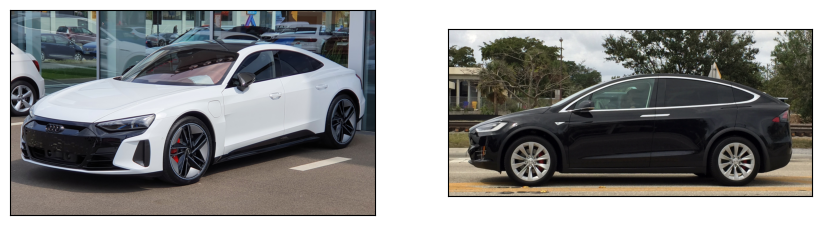

In [ ]:
from llama_index.core.response.notebook_utils import display_source_node

for text_node in response.metadata["text_nodes"]:
    display_source_node(text_node, source_length=200)
plot_images(
    [n.metadata["file_path"] for n in response.metadata["image_nodes"]]
)